In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import datetime as dt
import pandas as pd
import numpy as np

from apidata import (
    closing_prices,
    optimize_portfolio,
    backtest_portfolio,
    evaluate_portfolio,
)

In [2]:
# 1: <Good Performance> Select Stocks For Inclusion in Portfolio
selected_stocks = ["AMZN","JPM","FCX","HAL","F"]

In [3]:
# 2: Optimize Portfolio Around List of Provided Stocks
portfolio = optimize_portfolio(selected_stocks)

[0] Retrieving Stock Data: AMZN
[1] Retrieving Stock Data: JPM
[2] Retrieving Stock Data: FCX
[3] Retrieving Stock Data: HAL
[4] Retrieving Stock Data: F

Optimizing Portfolio Weights >> Simulations: x 5000

Optimized Portfolio Weights:
AMZN        0.5122
F           0.0309
FCX         0.0091
HAL         0.0218
JPM         0.4260
Return      0.2171
Sharpe      0.5838
Variance    0.2040
Name: 464, dtype: float64


In [4]:
# 3: Back-Test Performance of Optimized Portfolio Using Historical Data
performance = backtest_portfolio(portfolio)


Ticker: AMZN 	Portfolio Weight: 0.5122
                AMZN
Date                
2014-01-03 -0.001973
2014-01-06 -0.003643
2014-01-07  0.005694
2014-01-08  0.004981
2014-01-09 -0.001161

Ticker: F 	Portfolio Weight: 0.0309
                   F
Date                
2014-01-03  0.000140
2014-01-06  0.000139
2014-01-07 -0.000399
2014-01-08  0.000320
2014-01-09  0.000591

Ticker: FCX 	Portfolio Weight: 0.0091
                 FCX
Date                
2014-01-03 -0.000075
2014-01-06 -0.000073
2014-01-07 -0.000089
2014-01-08 -0.000115
2014-01-09 -0.000124

Ticker: HAL 	Portfolio Weight: 0.0218
                 HAL
Date                
2014-01-03  0.000052
2014-01-06  0.000082
2014-01-07 -0.000052
2014-01-08 -0.000306
2014-01-09  0.000048

Ticker: JPM 	Portfolio Weight: 0.426
                 JPM
Date                
2014-01-03  0.003281
2014-01-06  0.002462
2014-01-07 -0.004938
2014-01-08  0.003999
2014-01-09 -0.000797

[Historic] Portfolio Performance:
                 AMZN         F      

In [5]:
# 4: Evaluate Portfolio Historic Performance Against Benchmark
pfolio_eval = evaluate_portfolio(performance)

                AMZN         F       FCX       HAL       JPM      RTNp  \
Date                                                                     
2014-01-03 -0.001973  0.000140 -0.000075  0.000052  0.003281  0.001424   
2014-01-06 -0.003643  0.000139 -0.000073  0.000082  0.002462 -0.001033   
2014-01-07  0.005694 -0.000399 -0.000089 -0.000052 -0.004938  0.000215   
2014-01-08  0.004981  0.000320 -0.000115 -0.000306  0.003999  0.008879   
2014-01-09 -0.001161  0.000591 -0.000124  0.000048 -0.000797 -0.001443   

                RTNm    Excess       Compare  
Date                                          
2014-01-03  0.005026 -0.003602  Underperform  
2014-01-06 -0.021439  0.020406    Outperform  
2014-01-07  0.005109 -0.004894  Underperform  
2014-01-08 -0.005897  0.014776    Outperform  
2014-01-09 -0.005932  0.004490    Outperform  


In [6]:
# [View] Portfolio Evaluation Summary
pfolio_eval.head()

,AMZN,F,FCX,HAL,JPM,RTNp,RTNm,Excess,Compare
Date,,,,,,,,,
2014-01-03,-0.001973,0.000140,-0.000075,0.000052,0.003281,0.001424,0.005026,-0.003602,Underperform
2014-01-06,-0.003643,0.000139,-0.000073,0.000082,0.002462,-0.001033,-0.021439,0.020406,Outperform
2014-01-07,0.005694,-0.000399,-0.000089,-0.000052,-0.004938,0.000215,0.005109,-0.004894,Underperform
2014-01-08,0.004981,0.000320,-0.000115,-0.000306,0.003999,0.008879,-0.005897,0.014776,Outperform
2014-01-09,-0.001161,0.000591,-0.000124,0.000048,-0.000797,-0.001443,-0.005932,0.004490,Outperform


In [7]:
# [View] Evaluation Sample Size
pfolio_eval.count()

AMZN       1063
F          1063
FCX        1063
HAL        1063
JPM        1063
RTNp       1063
RTNm       1063
Excess     1063
Compare    1063
dtype: int64

In [8]:
# [View] Portfolio/Market Performance Comparison Summary
round(pfolio_eval["Compare"].value_counts()/pfolio_eval["Compare"].count(), 4)

Outperform      0.5127
Underperform    0.4873
Name: Compare, dtype: float64

In [9]:
pfolio_eval["RTNp"].head(10)

Date
2014-01-03    0.001424
2014-01-06   -0.001033
2014-01-07    0.000215
2014-01-08    0.008879
2014-01-09   -0.001443
2014-01-10   -0.005301
2014-01-13   -0.014940
2014-01-14    0.009851
2014-01-15    0.011350
2014-01-16   -0.003445
Name: RTNp, dtype: float64

In [10]:
xaxis_dates = pfolio_eval.reset_index()["Date"]
xmin = xaxis_dates.iloc[0]
xmax = xaxis_dates.iloc[-1]

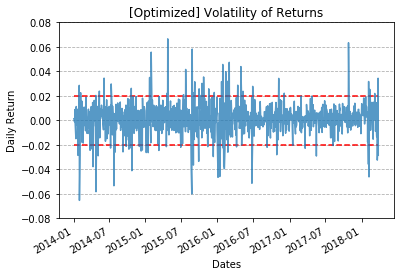

In [11]:
# [View] Volatility of Portfolio Returns
pfolio_eval["RTNp"].plot(alpha=.75)
plt.title("[Optimized] Volatility of Returns")
plt.xlabel("Dates")
plt.ylabel("Daily Return")
plt.ylim(-.08, .08)
plt.grid(axis="y", linestyle="dashed")
plt.hlines(.02, xmin, xmax, linestyle="dashed", colors="red")
plt.hlines(-.02, xmin, xmax, linestyle="dashed", colors="red")

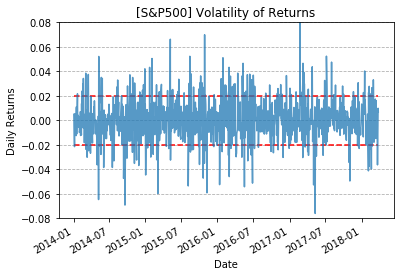

In [12]:
# [View] Volatility of Market Returns
pfolio_eval["RTNm"].plot(alpha=.75)
plt.title("[S&P500] Volatility of Returns")
plt.xlabel("Date")
plt.ylabel("Daily Returns")
plt.ylim(-.08, .08)
plt.grid(axis="y", linestyle="dashed")
plt.hlines(.02, xmin, xmax, linestyle="dashed", colors="red")
plt.hlines(-.02, xmin, xmax, linestyle="dashed", colors="red")

In [13]:
# Calculate Portfolio Beta -- Show The Correlation of Returns
# Explanation as to Why On an Absolute Basis Portfolio Underpeforms Only Slightly


In [14]:
rtn_df = pfolio_eval["RTNp"].apply(lambda x: x + 1).reset_index()

In [15]:
rtn_df.head()

,Date,RTNp
0,2014-01-03,1.001424
1,2014-01-06,0.998967
2,2014-01-07,1.000215
3,2014-01-08,1.008879
4,2014-01-09,0.998557


In [16]:
rtn_df.iloc[0]["Date"].date()

datetime.date(2014, 1, 3)

In [17]:
mkt_val = [(row[1][0].date(), row[1][1]) for row in rtn_df.iterrows()]

In [18]:
mkt_val[:10]

[(datetime.date(2014, 1, 3), 1.001424374596658),
 (datetime.date(2014, 1, 6), 0.9989667385221734),
 (datetime.date(2014, 1, 7), 1.000215064680869),
 (datetime.date(2014, 1, 8), 1.0088789253203667),
 (datetime.date(2014, 1, 9), 0.9985574737437145),
 (datetime.date(2014, 1, 10), 0.99469936854585),
 (datetime.date(2014, 1, 13), 0.985060317630467),
 (datetime.date(2014, 1, 14), 1.0098509763345145),
 (datetime.date(2014, 1, 15), 1.0113496514939464),
 (datetime.date(2014, 1, 16), 0.9965552230362782)]

In [19]:
pfolio_eval.describe()

,AMZN,F,FCX,HAL,JPM,RTNp,RTNm,Excess
count,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000,1063.000000
mean,0.000638,-0.000010,-0.000007,-0.000001,0.000247,0.000867,0.000294,0.000573
std,0.009503,0.000442,0.000330,0.000427,0.005595,0.012902,0.017077,0.018847
min,-0.059673,-0.002632,-0.002069,-0.002506,-0.030676,-0.065353,-0.076003,-0.084346
25%,-0.003542,-0.000224,-0.000158,-0.000227,-0.002351,-0.005199,-0.008794,-0.009778
50%,0.000568,0.000000,-0.000004,-0.000005,0.000227,0.001184,0.000000,0.000530
75%,0.005291,0.000249,0.000138,0.000250,0.003183,0.007452,0.009350,0.011113
max,0.067702,0.001531,0.002293,0.002293,0.034080,0.066619,0.082238,0.093349
